<a href="https://colab.research.google.com/github/het1752/machine-learning/blob/main/Bank_Marketing_Campaign_deposit_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Information about dataset:

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

Term Deposit:

A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time. For more information with regards to Term Deposits please click on this link from Investopedia:

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read data set
df = pd.read_csv('data.csv')
# head of dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [ ]:
# structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8371 entries, 0 to 8370
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8371 non-null   int64 
 1   job        8371 non-null   object
 2   marital    8371 non-null   object
 3   education  8371 non-null   object
 4   default    8371 non-null   object
 5   balance    8371 non-null   int64 
 6   housing    8371 non-null   object
 7   loan       8371 non-null   object
 8   contact    8371 non-null   object
 9   day        8371 non-null   int64 
 10  month      8371 non-null   object
 11  duration   8371 non-null   int64 
 12  campaign   8371 non-null   int64 
 13  pdays      8371 non-null   int64 
 14  previous   8371 non-null   int64 
 15  poutcome   8371 non-null   object
 16  deposit    8371 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.1+ MB


In [ ]:
# rows and columns
df.shape

(8371, 17)

In [ ]:
# numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000,8371.000000
mean,41.197467,1517.811134,15.588460,372.898698,2.512603,49.911958,0.823677
std,11.809300,3225.312218,8.406768,346.706743,2.734037,107.308417,2.315285
min,18.000000,-3058.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,116.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,532.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1694.000000,21.000000,504.000000,3.000000,2.000000,1.000000
max,95.000000,81204.000000,31.000000,3284.000000,63.000000,854.000000,58.000000


In [ ]:
# find unique value in each columns
for column in df.select_dtypes(include='object').columns:
    print(column)
    print(df[column].unique())

job
['technician' 'housemaid' 'management' 'blue-collar' 'services' 'admin.'
 'unemployed' 'student' 'entrepreneur' 'retired' 'self-employed' 'unknown']
marital
['married' 'single' 'divorced']
education
['tertiary' 'primary' 'secondary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'aug' 'may' 'jan' 'feb' 'apr' 'jul' 'jun' 'nov' 'sep' 'mar' 'dec']
poutcome
['success' 'unknown' 'failure' 'other']
deposit
['no' 'yes']


### Exploratory Data Analysis 

In [ ]:
# 1. find missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# 2. find categorical feature
cf=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
cf

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
for feature in cf:
    print('The feature is',feature , 'and number of categories are :' , len(df[feature].unique()))

The feature is job and number of categories are : 12
The feature is marital and number of categories are : 3
The feature is education and number of categories are : 4
The feature is default and number of categories are : 2
The feature is housing and number of categories are : 2
The feature is loan and number of categories are : 2
The feature is contact and number of categories are : 3
The feature is month and number of categories are : 12
The feature is poutcome and number of categories are : 4


there are 9 categorical features
feature job and month has highest number of categorical values

No missing value found

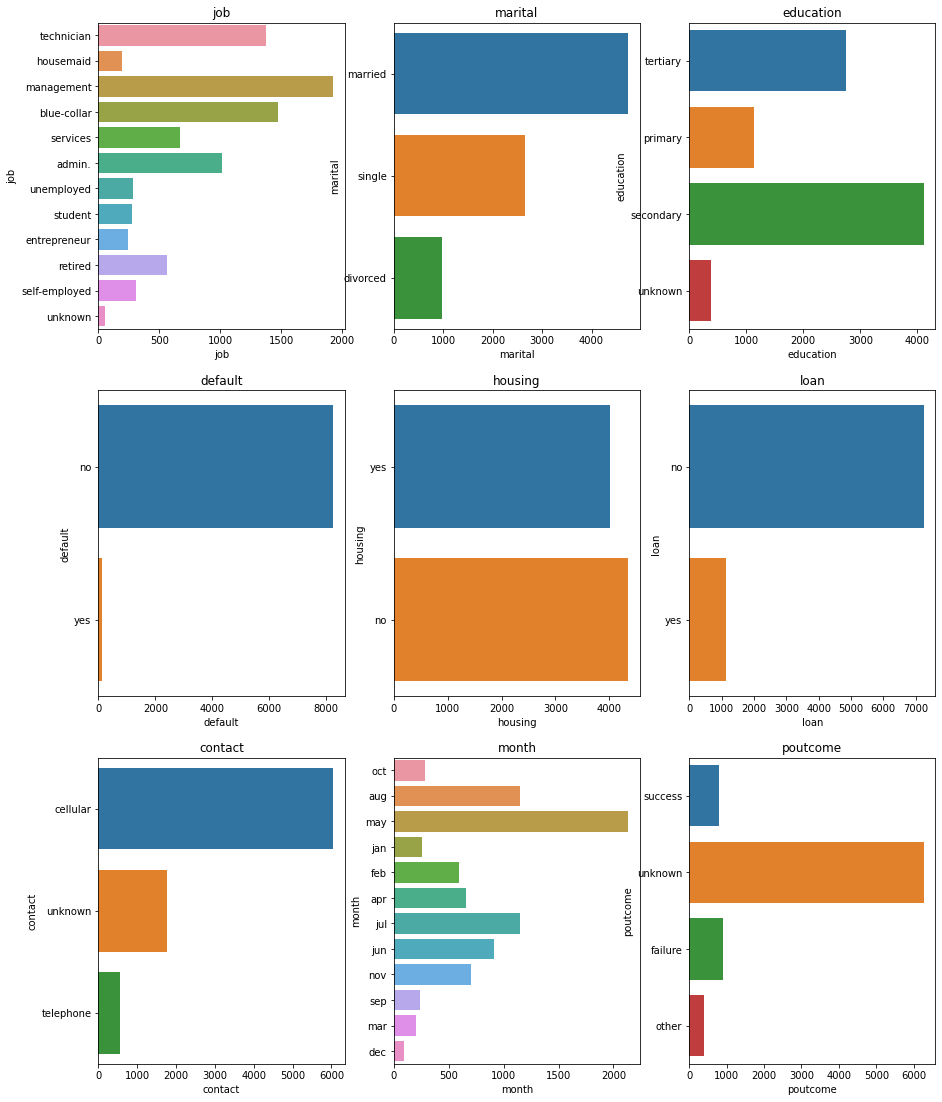

In [ ]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cf1 in cf:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cf1,data=df)
    plt.xlabel(cf1)
    plt.title(cf1)
    plotnumber+=1
plt.show()

client record with job and management are high and housemaid are very less

client who married are high and divorced are less

client whom education background is secondary are in high numbers

In [ ]:
# numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()


Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,38,127,14,113,1,50,2
1,41,365,8,203,5,-1,0
2,39,2454,4,716,3,263,2
3,49,6215,11,549,1,-1,0
4,37,1694,29,404,2,251,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

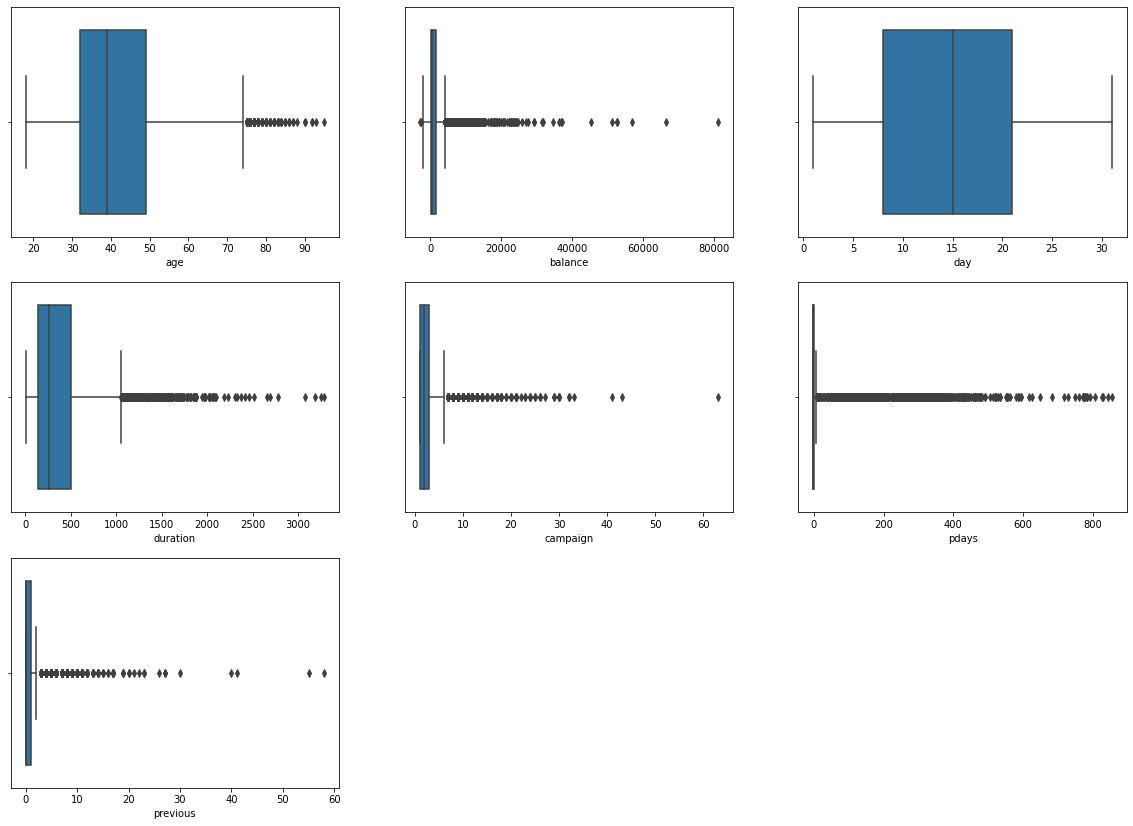

In [ ]:
# find outliers in numeric features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

There are some outlier in age, balance, duration, compaign, pdays and previous

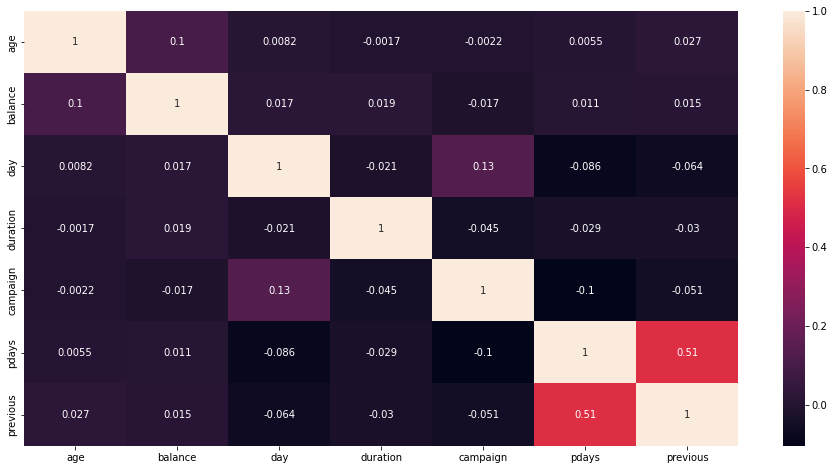

In [ ]:
# correlations in numeric feature
cmat=df.corr()
fig = plt.figure(figsize=(16,8))
sns.heatmap(cmat,annot=True)

Feature engineering 


In [ ]:
# 1. handle categorical data
df2=df.copy()
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,38,technician,married,tertiary,no,127,yes,no,cellular,14,oct,113,1,50,2,success,no
1,41,housemaid,married,primary,no,365,no,no,cellular,8,aug,203,5,-1,0,unknown,no
2,39,management,single,tertiary,no,2454,yes,no,cellular,4,may,716,3,263,2,failure,yes
3,49,blue-collar,married,primary,no,6215,yes,no,cellular,11,may,549,1,-1,0,unknown,no
4,37,services,married,secondary,no,1694,yes,yes,cellular,29,jan,404,2,251,6,failure,no


In [ ]:
#defaut features does not play imp role
df2.drop(['default'],axis=1,inplace=True)

In [ ]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['pdays'],axis=1, inplace=True)

In [ ]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     4
19     9
20    16
21    23
22    33
      ..
88     1
90     2
92     2
93     1
95     1
Name: age, Length: 75, dtype: int64

In [ ]:
# remove outliers in feature balance...
df2.groupby(['deposit','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit


deposit  balance
no       -2712      1
         -2049      1
         -1965      1
         -1636      1
         -1531      1
                   ..
yes       34646     1
          36252     1
          45248     1
          52587     2
          81204     1
Name: balance, Length: 4295, dtype: int64

In [ ]:
# remove outliers in feature col
df2.groupby(['deposit','campaign'],sort=True)['campaign'].count()

deposit  campaign
no       1           1685
         2           1226
         3            533
         4            348
         5            178
         6            126
         7             65
         8             76
         9             38
         10            31
         11            19
         12            19
         13            19
         14             9
         15             6
         16             6
         17             6
         18             7
         19             2
         20             4
         21             5
         22             1
         23             2
         24             2
         25             2
         26             2
         27             1
         29             1
         30             4
         32             1
         33             1
         41             1
         43             1
         63             1
yes      1           1915
         2           1031
         3            465
         4          

In [ ]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df2 = pd.concat([df2.drop(col, axis=1),pd.get_dummies(df2[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [ ]:
bool_columns = ['housing', 'loan', 'deposit']
for col in  bool_columns:
    df2[col+'_new']=df2[col].apply(lambda x : 1 if x == 'yes' else 0)
    df2.drop(col, axis=1, inplace=True)

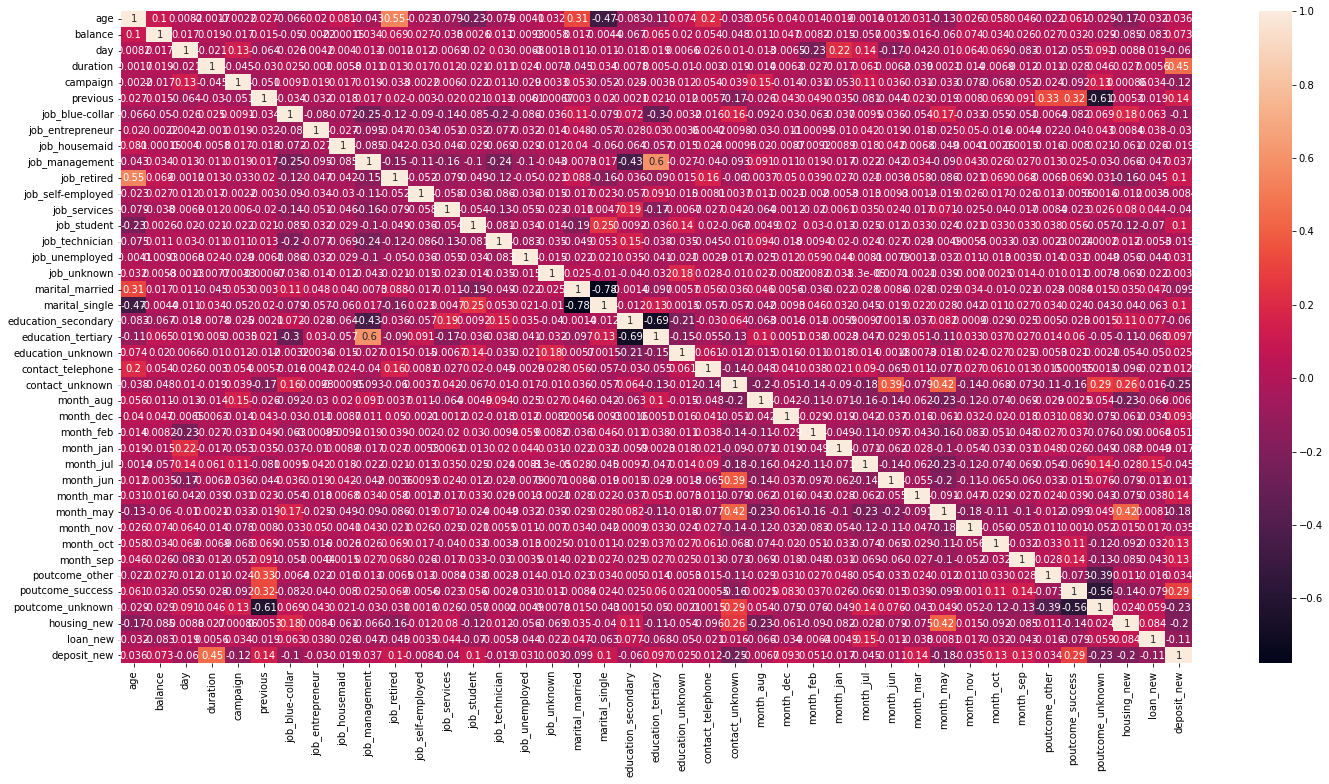

In [ ]:
# how column correlate with target class
cmat2=df2.corr()
fig2 = plt.figure(figsize=(24,12))
sns.heatmap(cmat2,annot=True)

In [ ]:
# all column data in numerical form
df2.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new
0,38,127,14,113,1,2,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,41,365,8,203,5,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,39,2454,4,716,3,2,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
3,49,6215,11,549,1,0,1,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4,37,1694,29,404,2,6,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


## Spliting-Training-Testing Data

In [ ]:
X = df2.drop(['deposit_new'],axis=1)
y = df2['deposit_new']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
len(x_train),len(x_test),len(y_train),len(y_test)

(6696, 1675, 6696, 1675)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=x_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.84477612 0.83569828 0.84914115 0.84914115 0.84092606]
0.8439365532308584


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(x_test))
cm

array([[738, 146],
       [ 99, 692]])

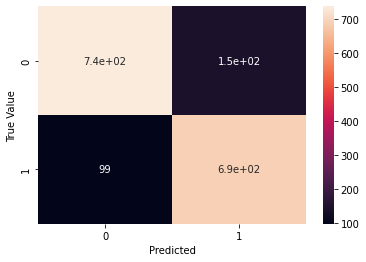

In [ ]:
#plot the graph
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [ ]:
import sklearn

In [ ]:
print('Precision:', sklearn.metrics.precision_score(y_test,model.predict(x_test)))

Precision: 0.8257756563245824


In [ ]:
print('Recall:', sklearn.metrics.recall_score(y_test,model.predict(x_test)))

Recall: 0.8748419721871049


In [ ]:
print('F1-Score:', sklearn.metrics.f1_score(y_test,model.predict(x_test)))

F1-Score: 0.8496009821976673


## Experiment on test dataset

In [ ]:
real_data=pd.read_csv('/content/test_data.csv')

In [ ]:
real_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,31,blue-collar,single,secondary,yes,477,no,no,cellular,20,nov,426,2,189,6,failure
1,49,blue-collar,married,primary,no,599,no,no,cellular,23,jul,464,1,-1,0,unknown
2,51,self-employed,single,tertiary,no,400,no,yes,cellular,27,may,200,1,-1,0,unknown
3,33,technician,married,secondary,no,488,yes,no,unknown,8,may,703,1,-1,0,unknown
4,34,admin.,married,secondary,no,40,yes,no,telephone,5,may,125,2,-1,0,unknown


In [ ]:
catc = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  catc:
    real_data = pd.concat([real_data.drop(col, axis=1),pd.get_dummies(real_data[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [ ]:
boolc = ['housing', 'loan']
for col in  boolc:
    real_data[col+'_new']=real_data[col].apply(lambda x : 1 if x == 'yes' else 0)
    real_data.drop(col, axis=1, inplace=True)

In [ ]:
real_data.drop(['default','pdays'],axis=1,inplace=True)

In [ ]:
real_data.head()

,age,balance,day,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new
0,31,477,20,426,2,6,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,49,599,23,464,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,51,400,27,200,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
3,33,488,8,703,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
4,34,40,5,125,2,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [ ]:
result=model.predict(real_data)

In [ ]:
result

array([1, 1, 0, ..., 1, 1, 1])

In [ ]:
Dfres = pd.DataFrame(result)

In [ ]:
Dfres.to_csv("Results.csv")